<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Binary_Search_Tree_Iterator_II_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Search Tree Iterator II

Implement the BSTIterator class that represents an iterator over the in-order traversal of a binary search tree (BST):

- BSTIterator(TreeNode root) Initializes an object of the BSTIterator class. The root of the BST is given as part of the constructor. The pointer should be initialized to a non-existent number smaller than any element in the BST.
- boolean hasNext() Returns true if there exists a number in the traversal to the right of the pointer, otherwise returns false.
- int next() Moves the pointer to the right, then returns the number at the pointer.
- boolean hasPrev() Returns true if there exists a number in the traversal to the left of the pointer, otherwise returns false.
- int prev() Moves the pointer to the left, then returns the number at the pointer.

Notice that by initializing the pointer to a non-existent smallest number, the first call to next() will return the smallest element in the BST.

You may assume that next() and prev() calls will always be valid. That is, there will be at least a next/previous number in the in-order traversal when next()/prev() is called.

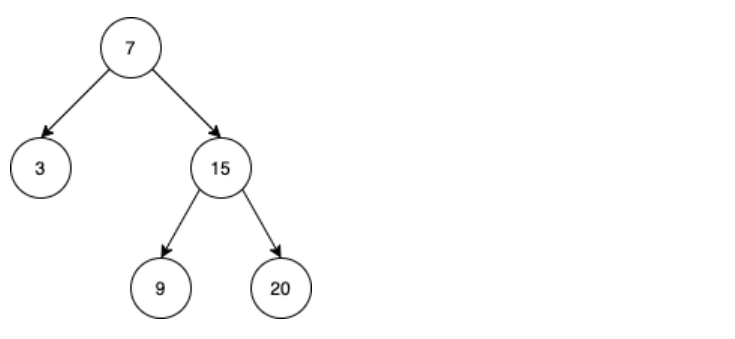

Example 1:

```
Input
["BSTIterator", "next", "next", "prev", "next", "hasNext", "next", "next", "next", "hasNext", "hasPrev", "prev", "prev"]
[[[7, 3, 15, null, null, 9, 20]], [null], [null], [null], [null], [null], [null], [null], [null], [null], [null], [null], [null]]
Output
[null, 3, 7, 3, 7, true, 9, 15, 20, false, true, 15, 9]

Explanation
// The underlined element is where the pointer currently is.
BSTIterator bSTIterator = new BSTIterator([7, 3, 15, null, null, 9, 20]); // state is   [3, 7, 9, 15, 20]
bSTIterator.next(); // state becomes [3, 7, 9, 15, 20], return 3
bSTIterator.next(); // state becomes [3, 7, 9, 15, 20], return 7
bSTIterator.prev(); // state becomes [3, 7, 9, 15, 20], return 3
bSTIterator.next(); // state becomes [3, 7, 9, 15, 20], return 7
bSTIterator.hasNext(); // return true
bSTIterator.next(); // state becomes [3, 7, 9, 15, 20], return 9
bSTIterator.next(); // state becomes [3, 7, 9, 15, 20], return 15
bSTIterator.next(); // state becomes [3, 7, 9, 15, 20], return 20
bSTIterator.hasNext(); // return false
bSTIterator.hasPrev(); // return true
bSTIterator.prev(); // state becomes [3, 7, 9, 15, 20], return 15
bSTIterator.prev(); // state becomes [3, 7, 9, 15, 20], return 9
```



Constraints:

```
The number of nodes in the tree is in the range [1, 105].
0 <= Node.val <= 106
At most 105 calls will be made to hasNext, next, hasPrev, and prev.
```



In [1]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
class BSTIterator:
    
    # Time = O(1)
    # Space = O(1)
    def __init__(self, root):
        self.last = root
        self.stack = []
        self.arr = []
        self.pointer = -1
        
    # time = O(1)
    # space = O(1)
    def hasNext(self) -> bool:
        return len(self.stack) > 0 or self.last != None or self.pointer < len(self.arr) - 1
        
    # time = O(n)
    # space = O(n)
    def next(self) -> int:
        self.pointer += 1
        
        if self.pointer > len(self.arr) - 1:
            while self.last:
                self.stack.append(self.last)
                self.last = self.last.left
            curr = self.stack.pop()
            self.arr.append(curr.val)
            self.last = curr.right
        
        return self.arr[self.pointer]
    
    # time = O(1)
    # space = O(1)
    def hasPrev(self) -> bool:
        return self.pointer > 0
        
    # time = O(1)
    # space = O(1)
    def prev(self) -> int:
        self.pointer -= 1
        return self.arr[self.pointer]
        


# Your BSTIterator object will be instantiated and called as such:
# obj = BSTIterator(root)
# param_1 = obj.hasNext()
# param_2 = obj.next()
# param_3 = obj.hasPrev()
# param_4 = obj.prev()

In [2]:
root = TreeNode(7)
root.left = TreeNode(3)
root.right = TreeNode(15)
root.right.left = TreeNode(9)
root.right.right = TreeNode(20)

bst_interator = BSTIterator(root)
print(bst_interator.next())
print(bst_interator.next())
print(bst_interator.prev())
print(bst_interator.next())
print(bst_interator.hasNext())
print(bst_interator.next())
print(bst_interator.next())
print(bst_interator.next())
print(bst_interator.hasNext())
print(bst_interator.hasPrev())
print(bst_interator.prev())
print(bst_interator.prev())

3
7
3
7
True
9
15
20
False
True
15
9


# Conceptual Note

- last : right node of stack[-1] (init: last = root). to traverse to its left
- stack : left branch
- array : inorder traversal up to pointer

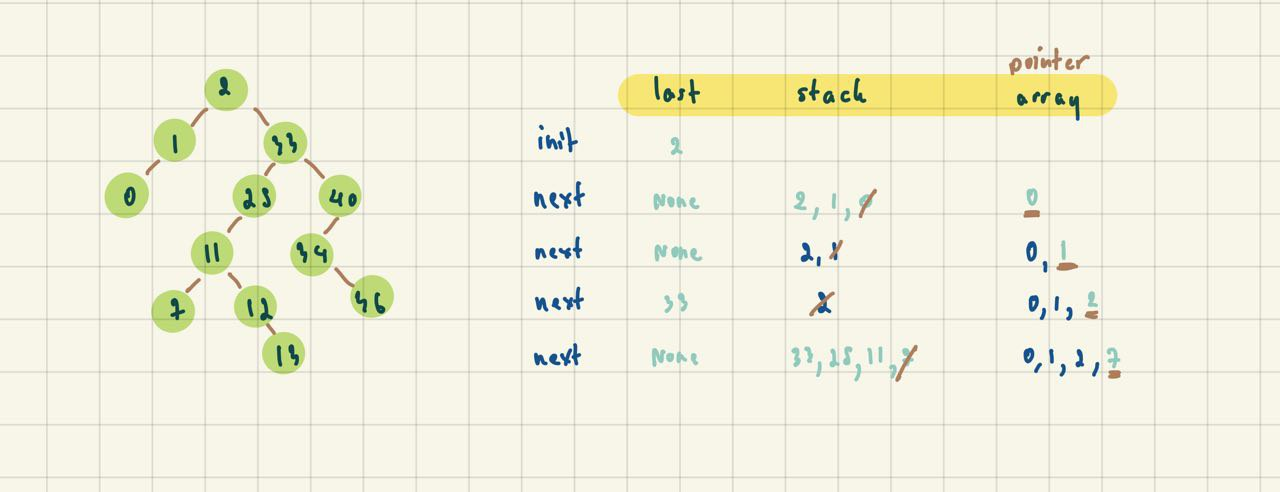